<a href="https://colab.research.google.com/github/jaehyunkim0211/bayesian/blob/master/ch01/ch01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,724 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160983 files and d

베이즈 정리 

$ P(A|X) = \frac{P(X|A)P(A)}{P(X)}$

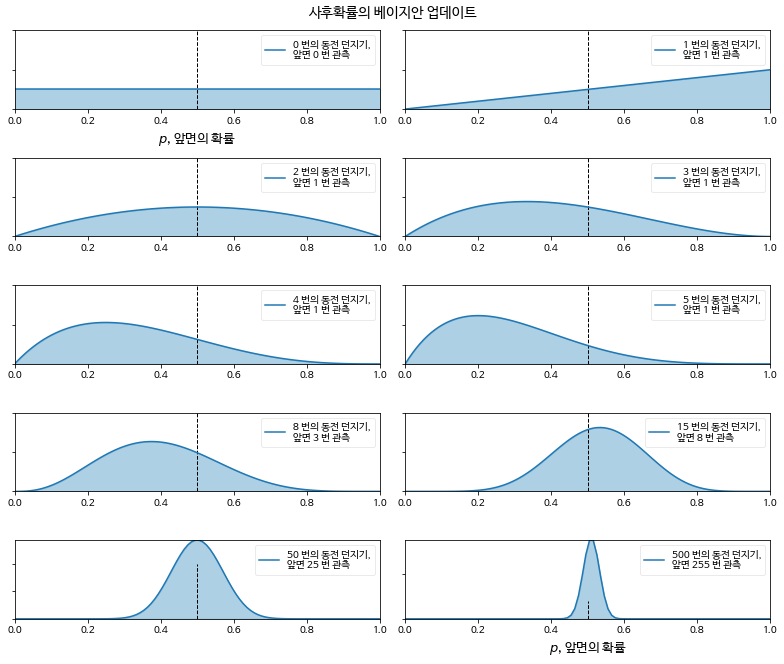

In [ ]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, 앞면의 확률", fontsize=13) \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="%d 번의 동전 던지기,\n앞면 %d 번 관측" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("사후확률의 베이지안 업데이트",y=1.02,fontsize=14)

plt.tight_layout()

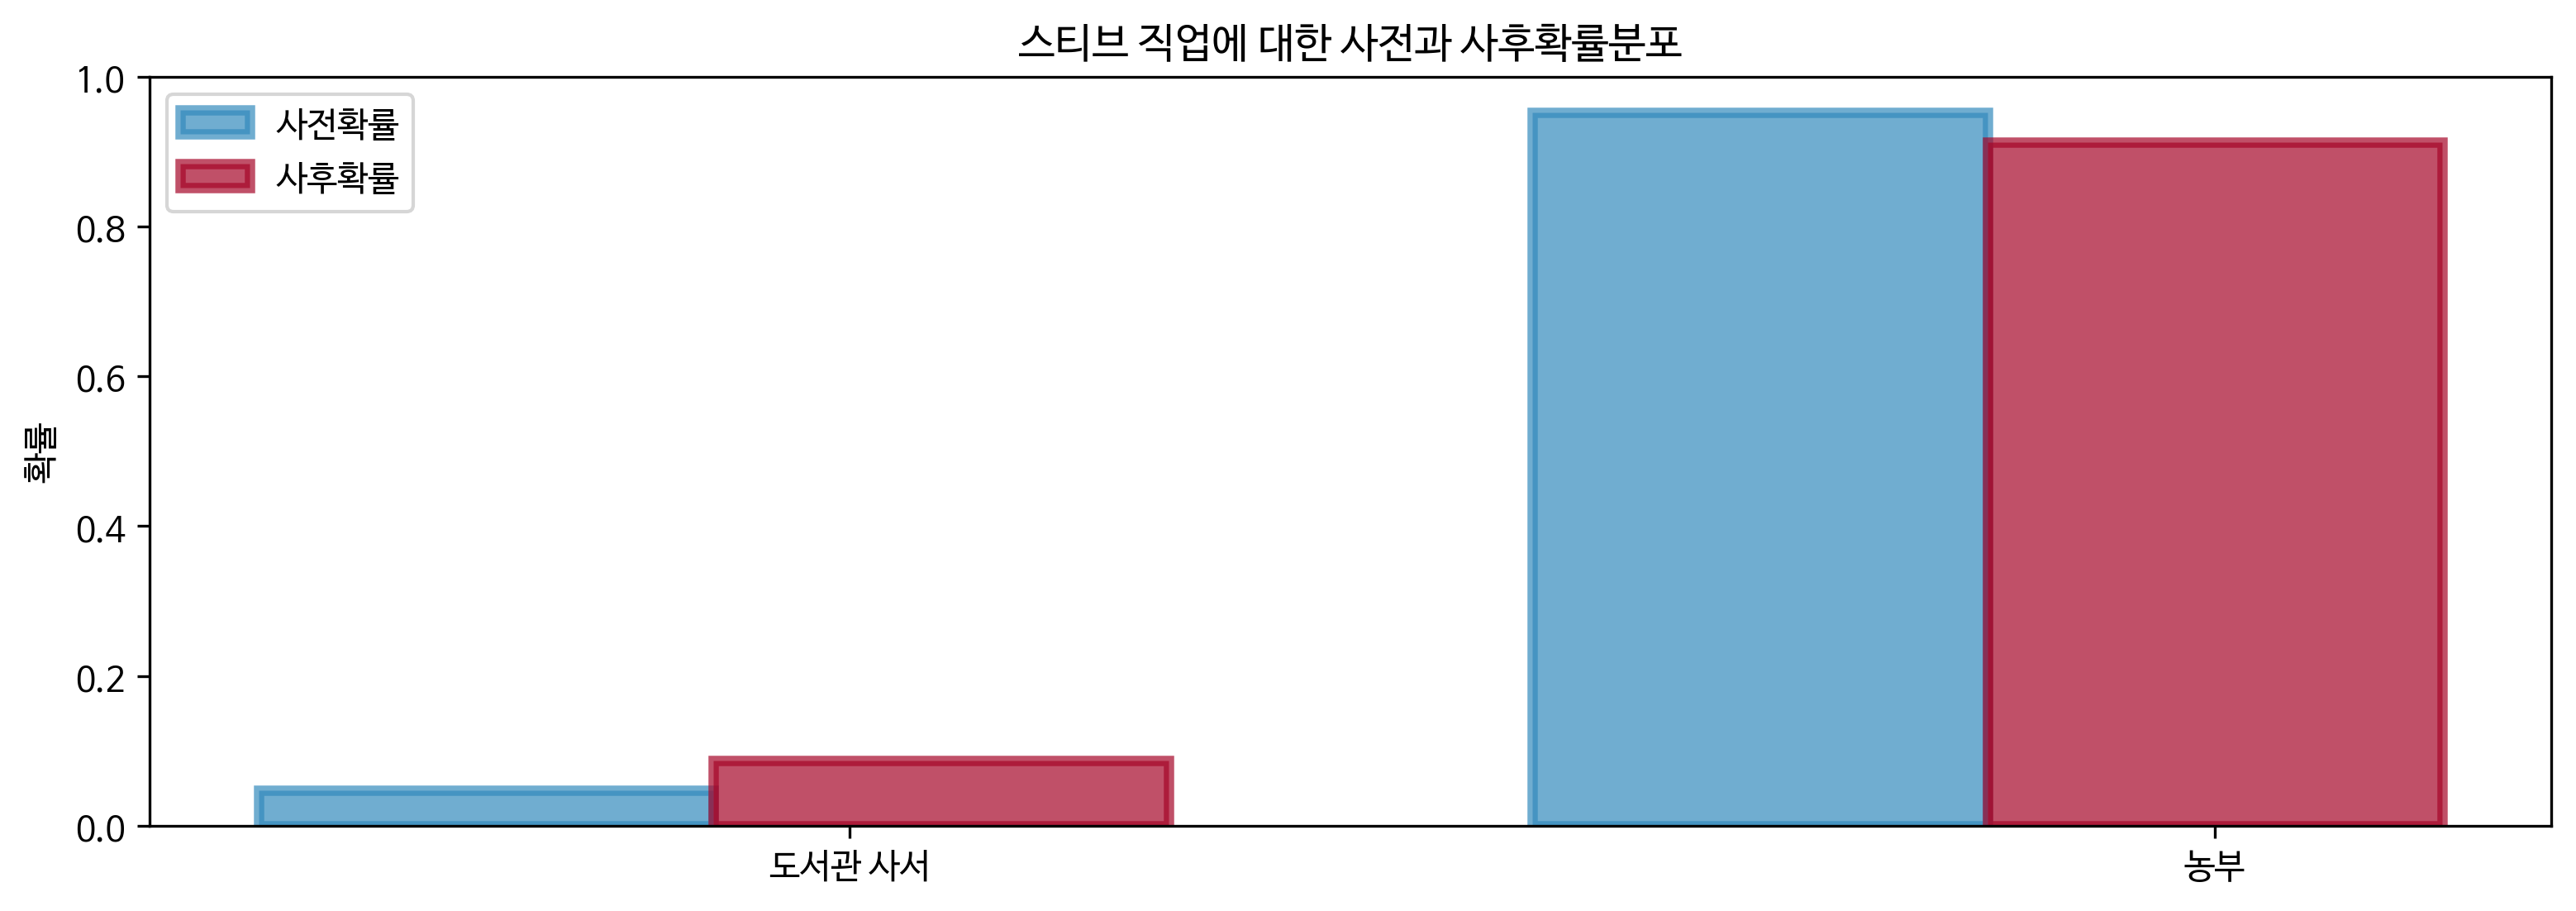

In [ ]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt

figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

colors = ["#348ABD", "#A60628"]
prior = [1/21., 20/21.]
posterior = [0.087,1-0.087]
plt.bar([0, .7], prior, alpha=0.70, width=0.25,
        color=colors[0], label="사전확률",
        lw="3", edgecolor="#348ABD")

plt.bar([0+0.25, .7+0.25], posterior, alpha=0.7,
        width=0.25, color=colors[1],
        label="사후확률",
        lw="3", edgecolor="#A60628")

plt.xticks([0.20, 0.95], ["도서관 사서", "농부"])
plt.title("스티브 직업에 대한 사전과 사후확률분포")
plt.ylabel("확률")
plt.legend(loc="upper left");

## 이산확률
푸아송분포(poisson-distribution)
$\lambda$는 양수이고 늘리면 큰값에 확률을 부여, 줄이면 작은 값으로 확률 부여, k는 음수가 아닌 정수

$P(Z=k)=\frac{\lambda^k e^{-\lambda}}{k!}$ 

푸아송분포의 유용한 속성은 기대값이 모수와 같다는 것.


Text(0.5, 1.0, '$\\lambda$값을 달리하여 만든 포아송 랜덤변수의 확률질량함수')

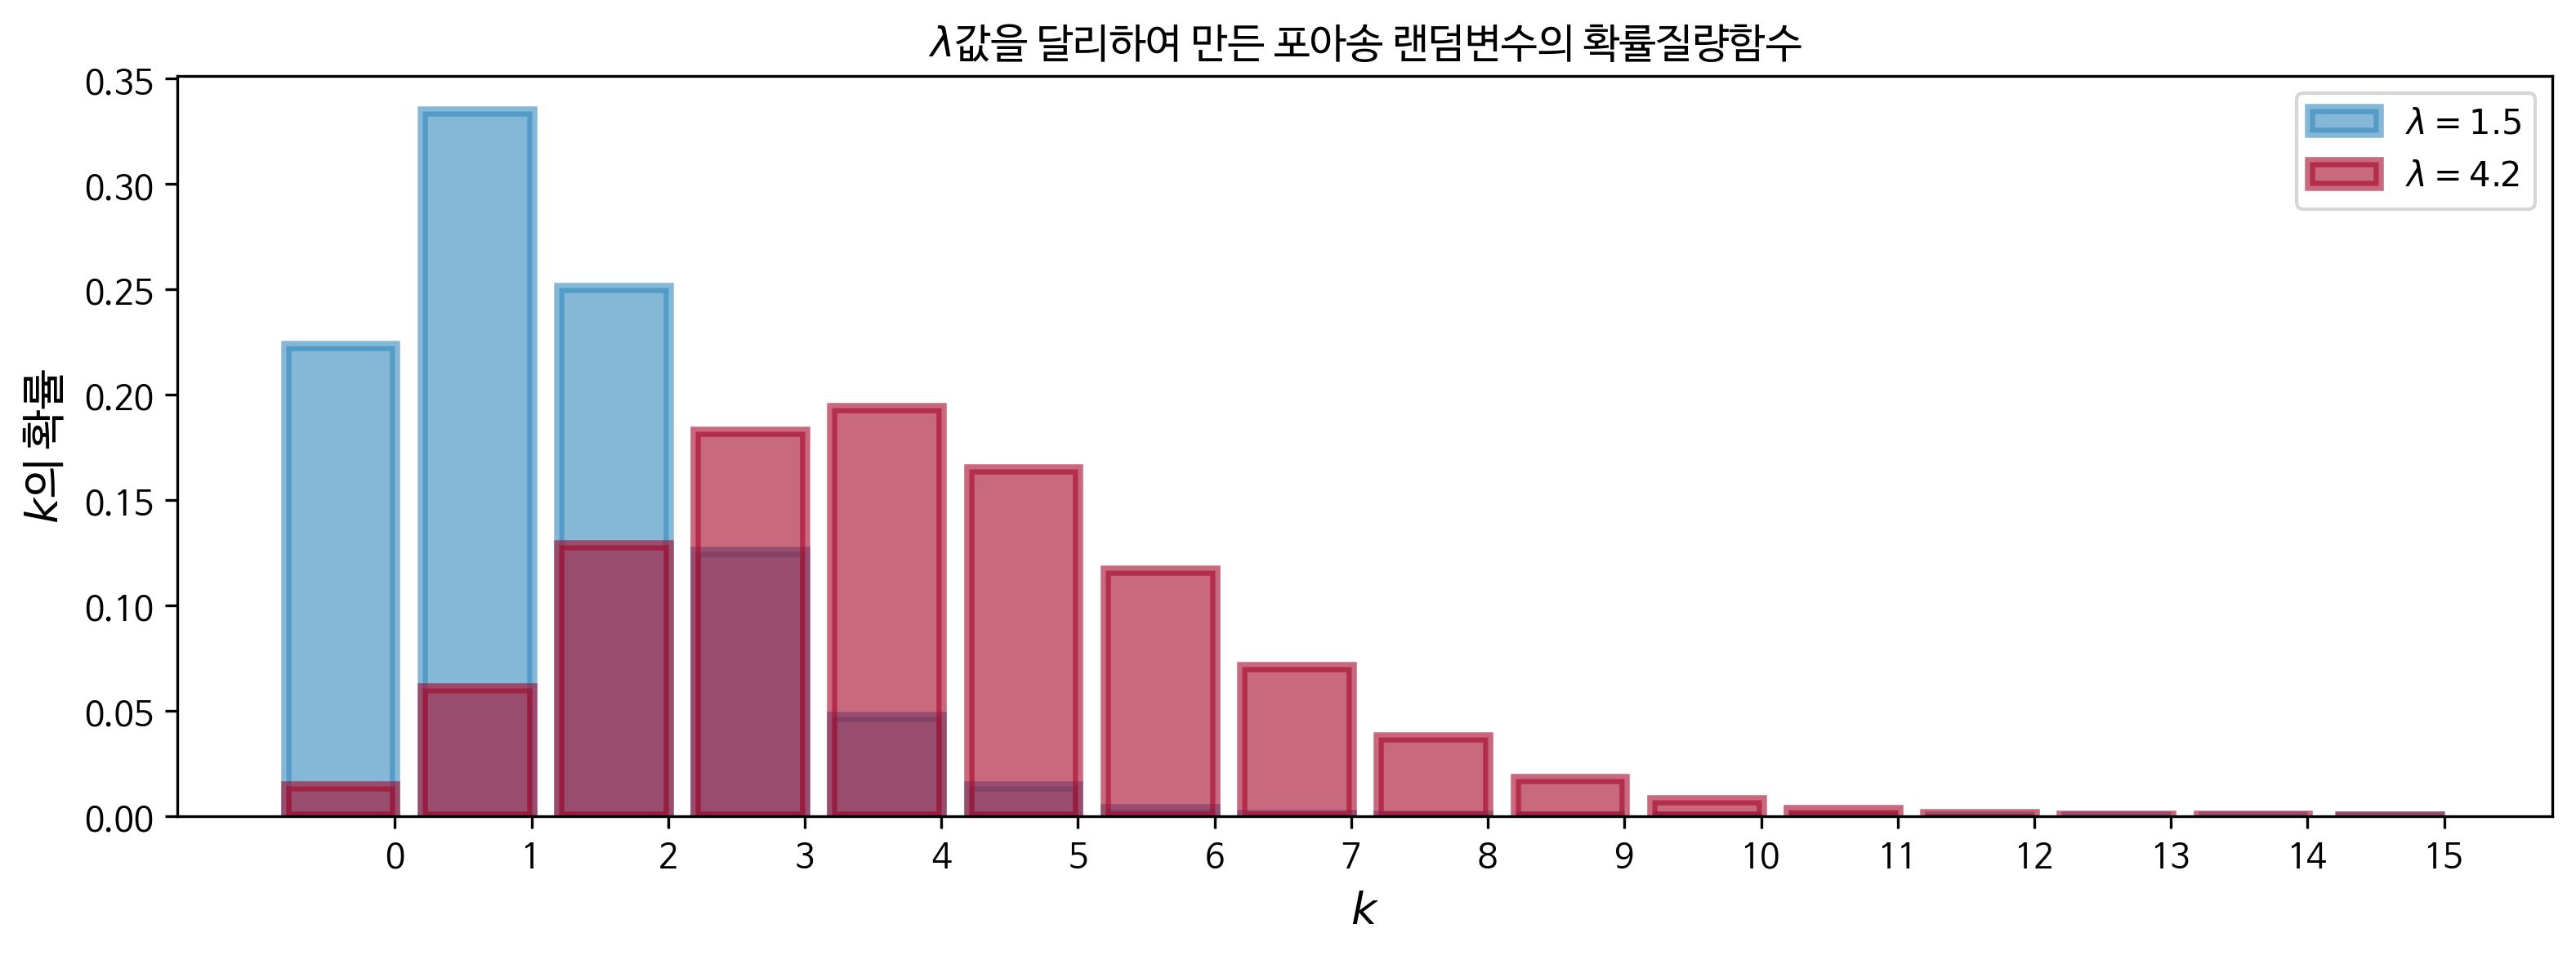

In [ ]:
figsize(12.5, 4)
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colours = ["#348ABD", "#A60628"]

plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0],
        label="$\lambda = %.1f$" % lambda_[0], alpha=0.60,
        edgecolor=colours[0], lw="3")

plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1],
        label="$\lambda = %.1f$" % lambda_[1], alpha=0.60,
        edgecolor=colours[1], lw="3")

plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("$k$의 확률", fontsize=13)
plt.xlabel("$k$", fontsize=13)
plt.title("$\lambda$값을 달리하여 만든 포아송 랜덤변수의 확률질량함수")

## 연속확률변수

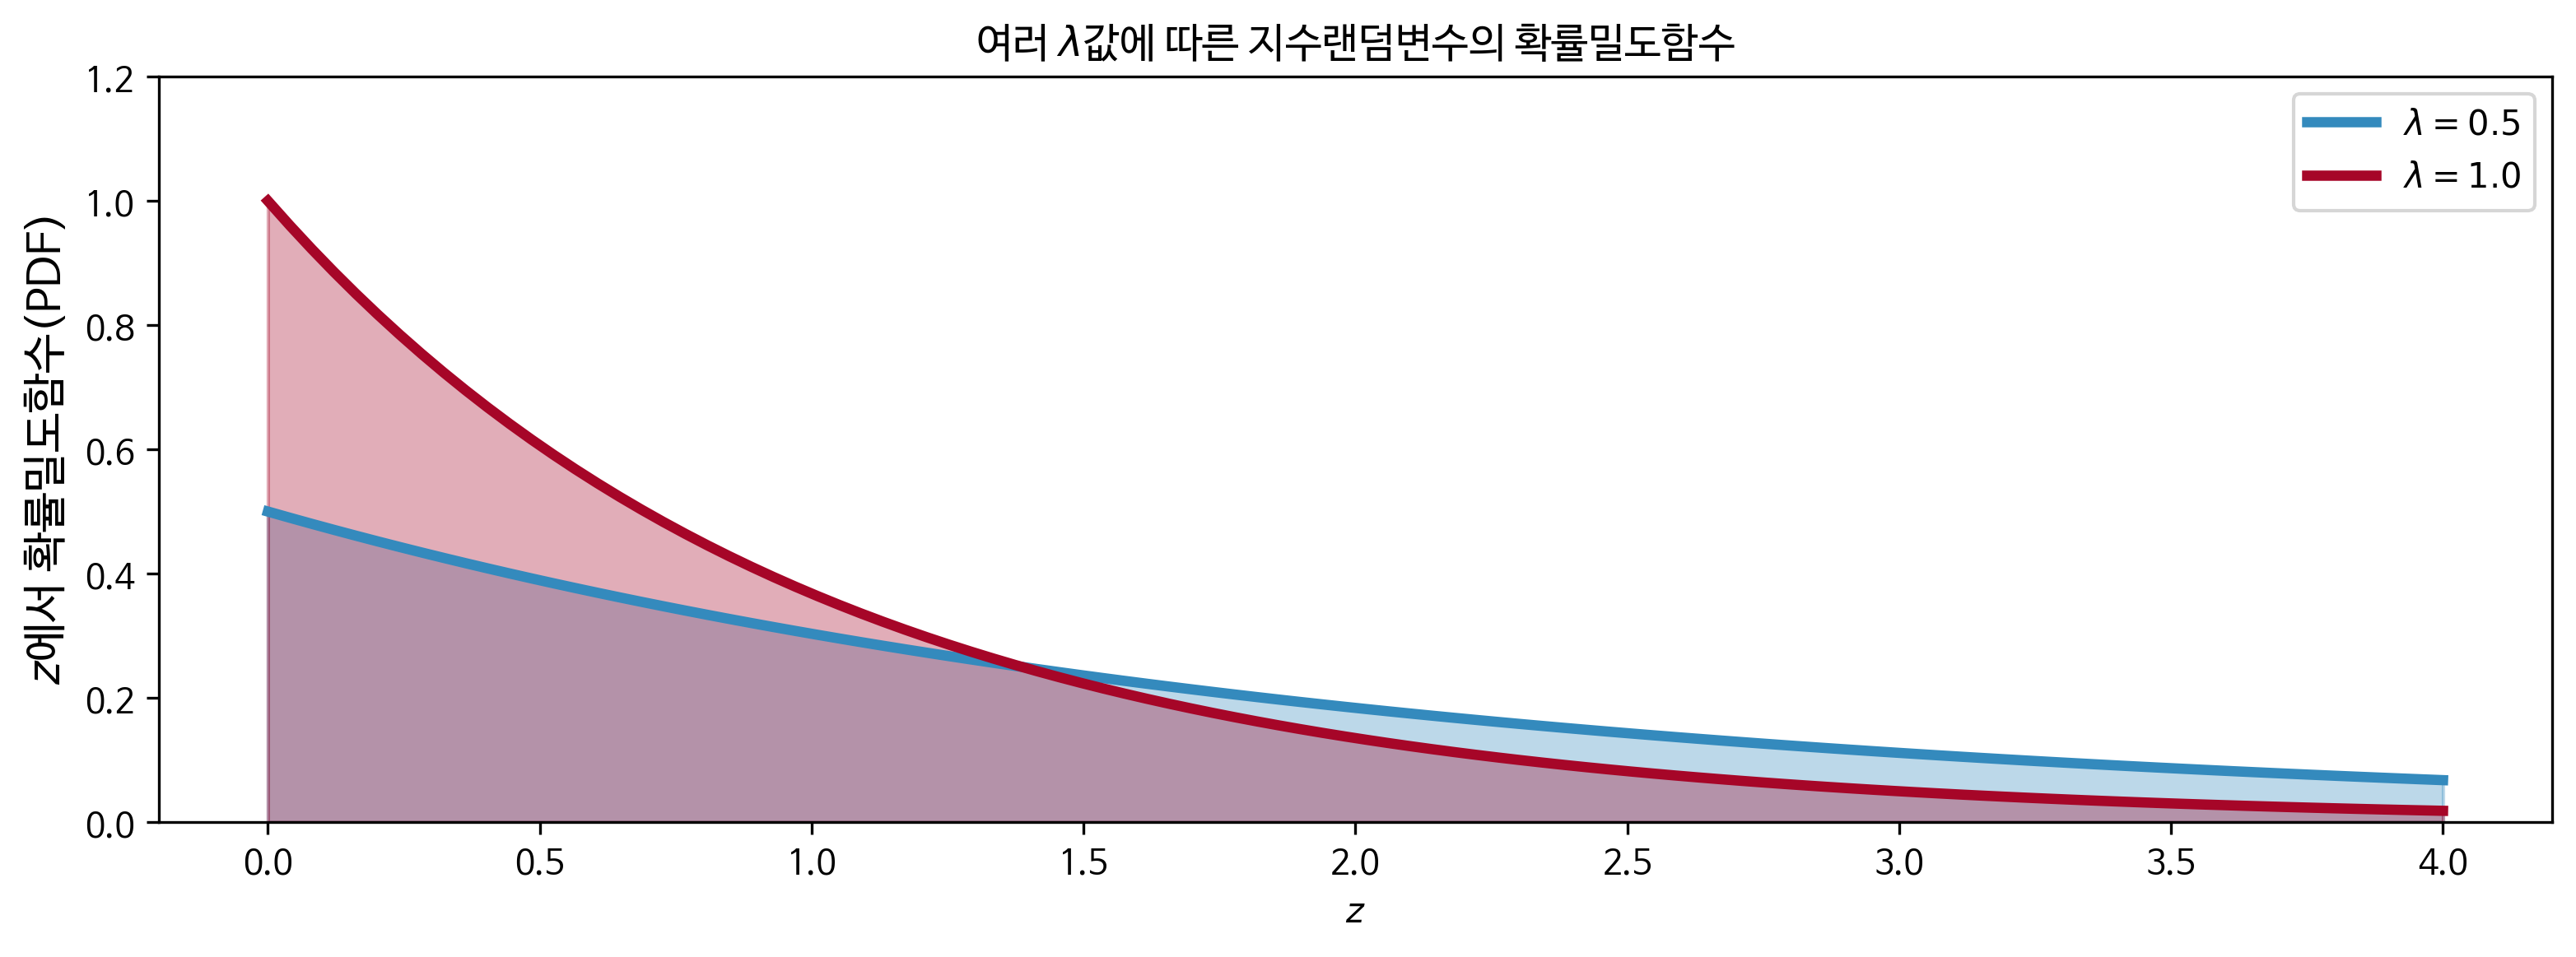

In [ ]:

a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colours):
    plt.plot(a, expo.pdf(a, scale=1. / l), lw=3,
             color=c, label="$\lambda = %.1f$" % l)
    plt.fill_between(a, expo.pdf(a, scale=1. / l), color=c, alpha=.33)

plt.legend()
plt.ylabel("$z$에서 확률밀도함수(PDF)",fontsize=13)
plt.xlabel("$z$")
plt.ylim(0, 1.2)
plt.title("여러 $\lambda$값에 따른 지수랜덤변수의 확률밀도함수");

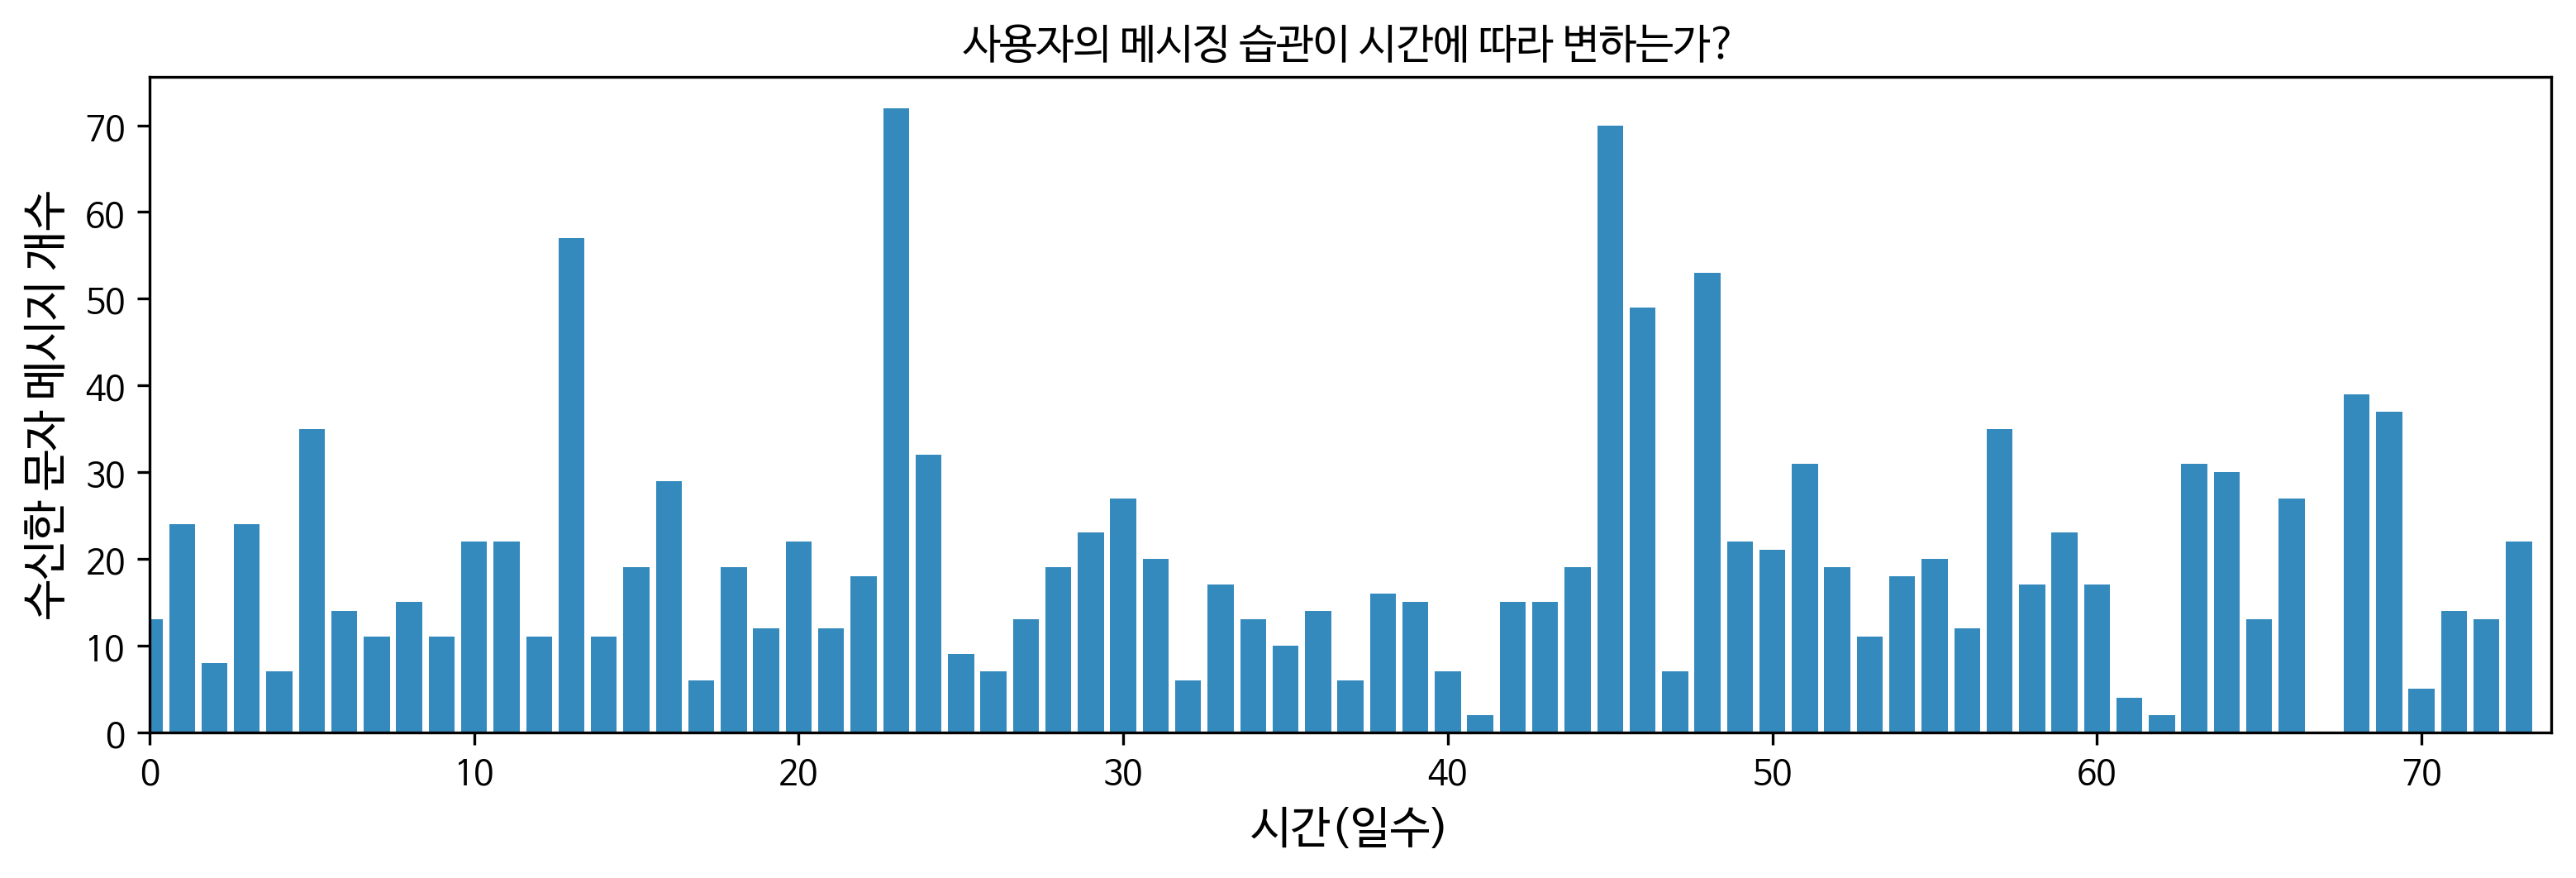

In [ ]:
figsize(12.5, 3.5)

#원문 코드
count_data = np.loadtxt(r"/content/drive/MyDrive/github/bayesian/ch01/txtdata.csv")
#실습 코드
# count_data = np.loadtxt(r"C:\Users\wh\006775\Ch01\txtdata.csv")

n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("시간(일수)",fontsize=13)
plt.ylabel("수신한 문자 메시지 개수",fontsize=13)
plt.title("사용자의 메시징 습관이 시간에 따라 변하는가?")
plt.xlim(0, n_count_data);

In [ ]:
!pip install pymc

In [ ]:
import pymc as pm

alpha = 1.0 / count_data.mean()  # count_data 변수는 문자메시지 갯수를 저장하고 있다
lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)

tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print("Random output:", tau.random(), tau.random(), tau.random())

Random output: 30 70 60


In [ ]:
@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_count_data)
    out[:tau] = lambda_1  # lambda1은 tau 이전 lambda이다
    out[tau:] = lambda_2  # lambda2는 tau 이후 lambda이다
    return out

In [ ]:
observation = pm.Poisson("obs", lambda_, value=count_data, observed=True)

model = pm.Model([observation, lambda_1, lambda_2, tau])

In [ ]:
# 3장에서 이 코드를 설명할 것이다
# we will get
# 30,000 (40,000 minus 10,000) samples back.
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000)

/usr/local/lib/python3.7/dist-packages/pymc/MCMC.py:81: UserWarning: Instantiating a Model object directly is deprecated. We recommend passing variables directly to the Model subclass.
  warnings.warn(message)


 [-----------------100%-----------------] 40000 of 40000 complete in 11.6 sec

In [ ]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]

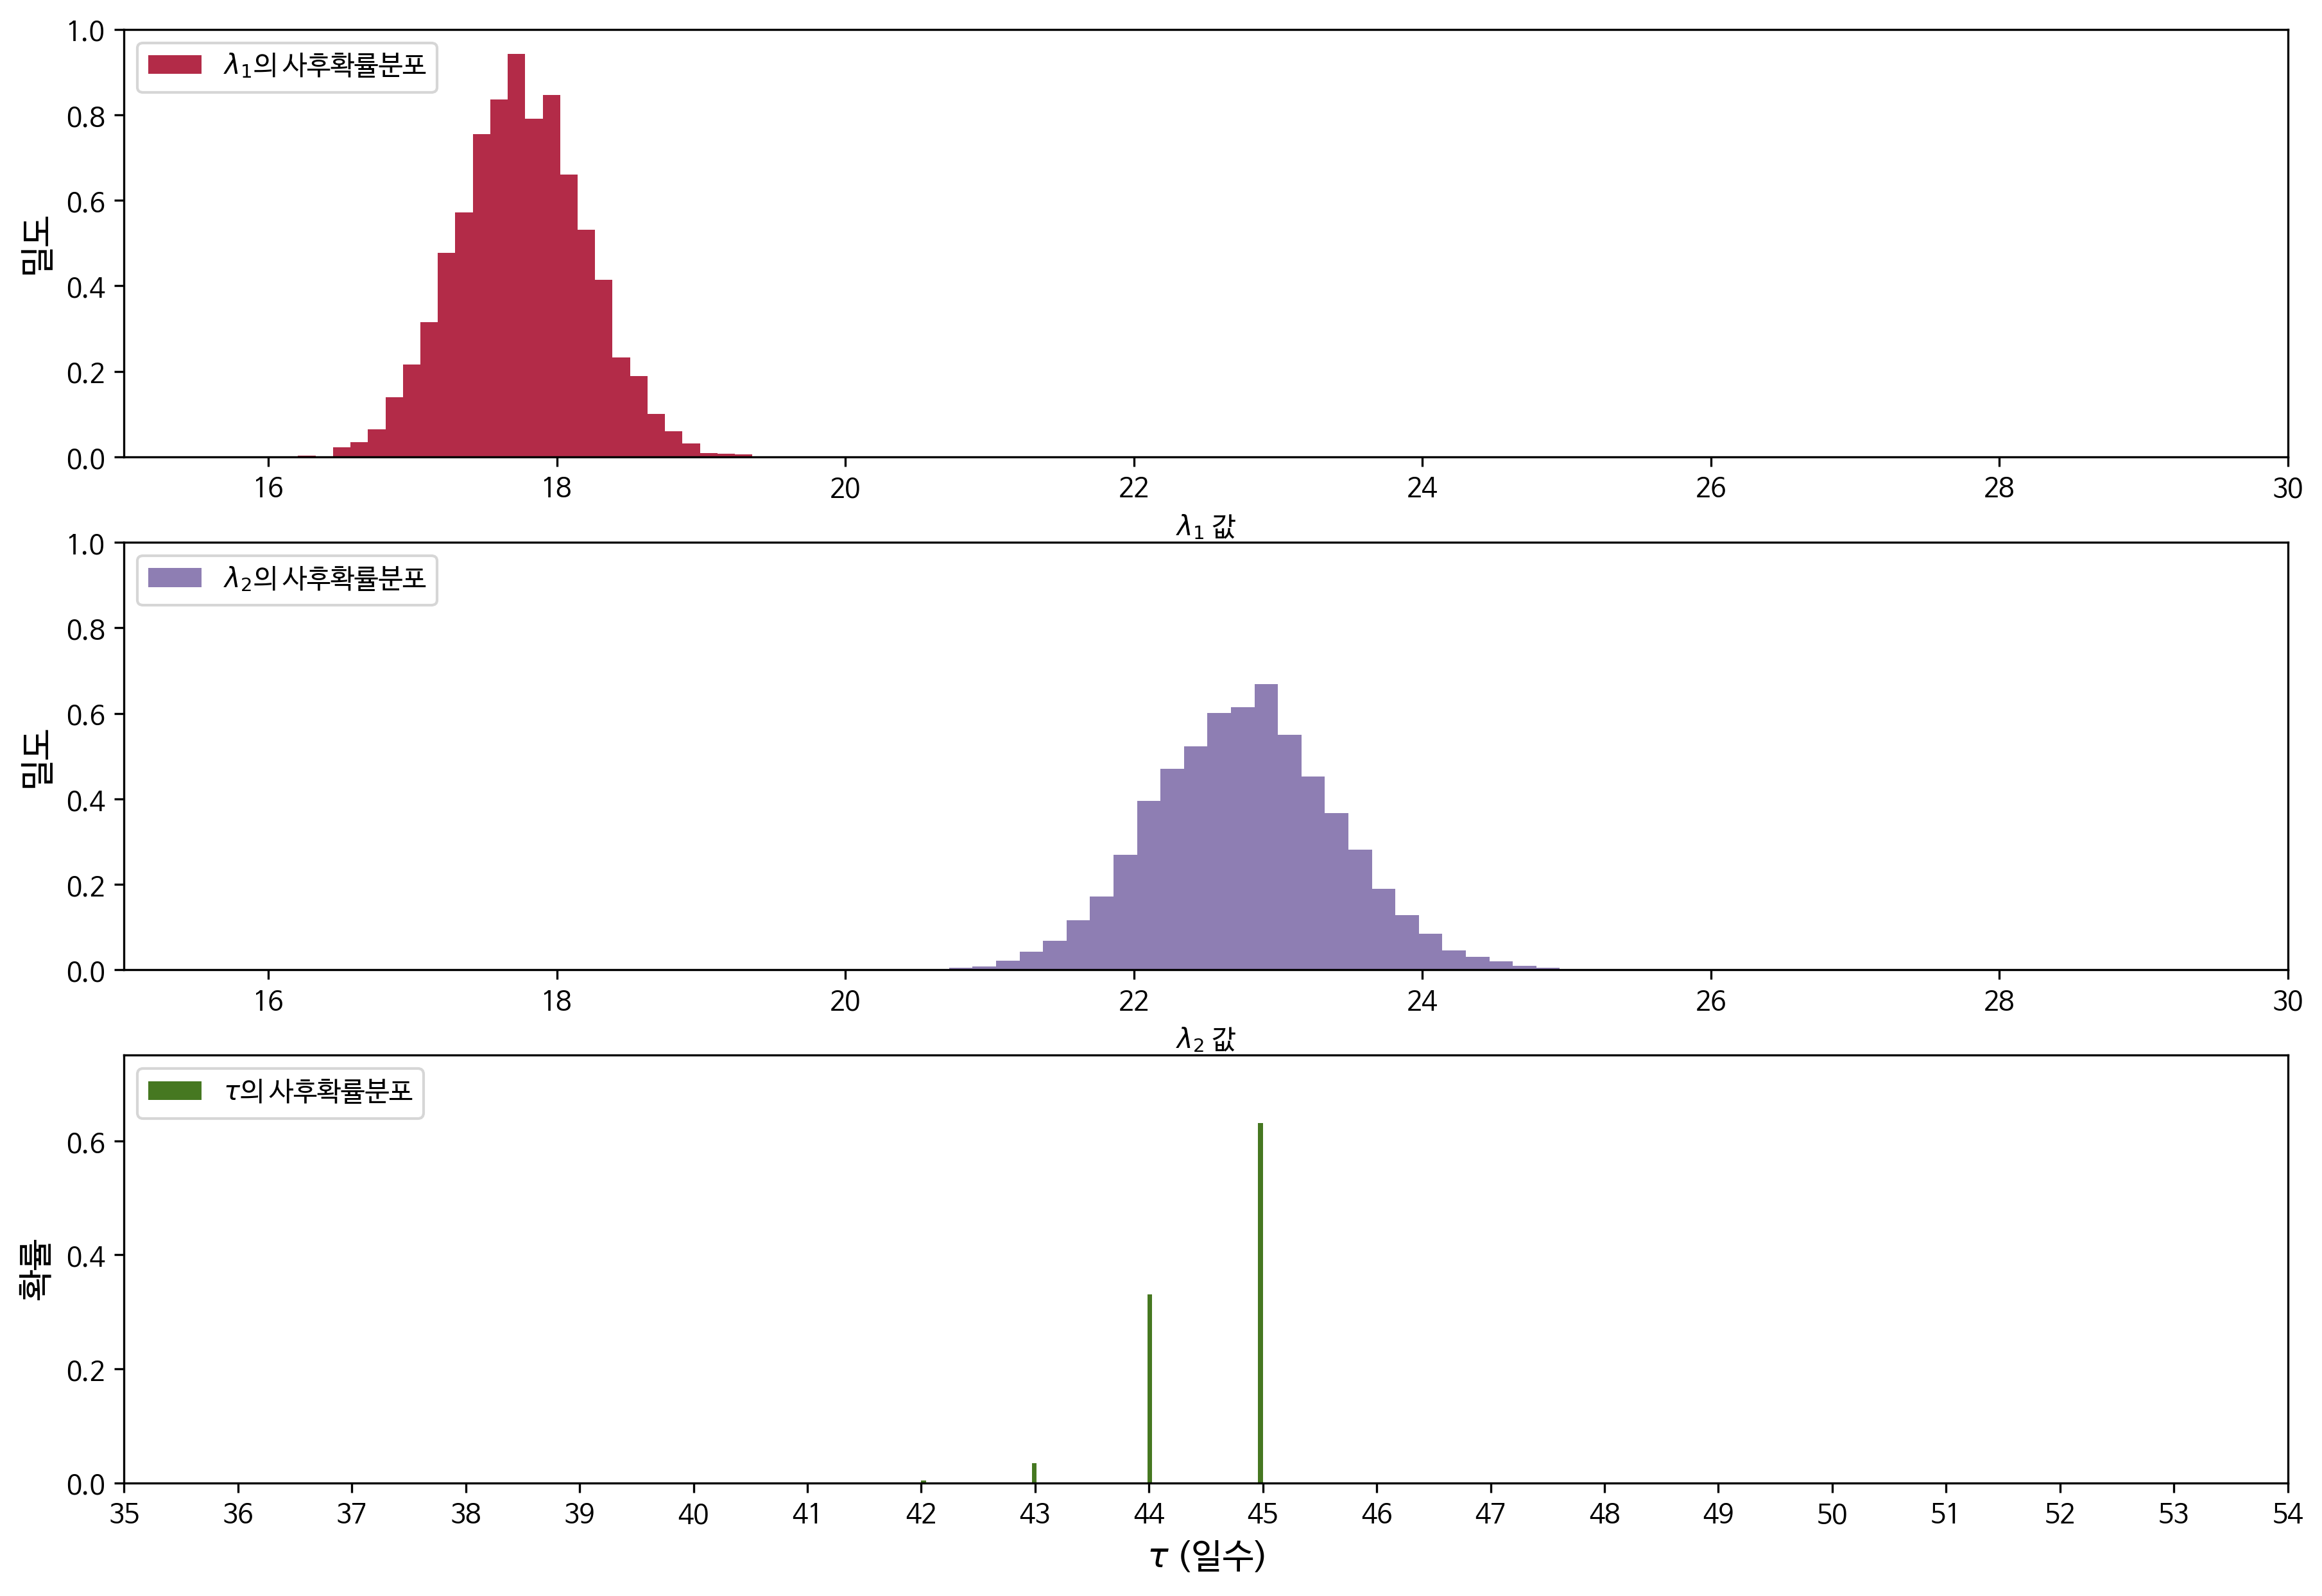

In [ ]:
figsize(14.5, 10)
# 표본의 히스토그램:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85, label="$\lambda_1$의 사후확률분포", color="#A60628", density=True)
plt.legend(loc="upper left")
#plt.title(r"""모수 $\lambda_1,\;\lambda_2,\;\tau$의 사후확률분포""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ 값")
plt.ylabel("밀도", fontsize=13)
ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85, label="$\lambda_2$의 사후확률분포", color="#7A68A6", density=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ 값")
plt.ylabel("밀도",fontsize=13)

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1, label=r"$\tau$의 사후확률분포", color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data) - 20])
plt.xlabel(r"$\tau$ (일수)",fontsize=13)
plt.ylabel("확률",fontsize=13);

[17.75588527 17.75588527 17.75588527 17.75588527 17.75588527 17.75588527
 17.75588527 17.75588527 17.75588527 17.75588527 17.75588527 17.75588527
 17.75588527 17.75588527 17.75588527 17.75588527 17.75588527 17.75588527
 17.75588527 17.75588527 17.75588527 17.75588527 17.75588527 17.75588527
 17.75588527 17.75588527 17.75588527 17.75588527 17.75588527 17.75588527
 17.75588527 17.75588527 17.75588527 17.75588527 17.75588527 17.75588527
 17.75588527 17.75588527 17.75588527 17.75588527 17.75588527 17.75588527
 17.77196222 17.9310417  19.57374011 22.77207209 22.77207209 22.77207209
 22.77207209 22.77207209 22.77207209 22.77207209 22.77207209 22.77207209
 22.77207209 22.77207209 22.77207209 22.77207209 22.77207209 22.77207209
 22.77207209 22.77207209 22.77207209 22.77207209 22.77207209 22.77207209
 22.77207209 22.77207209 22.77207209 22.77207209 22.77207209 22.77207209
 22.77207209 22.77207209]


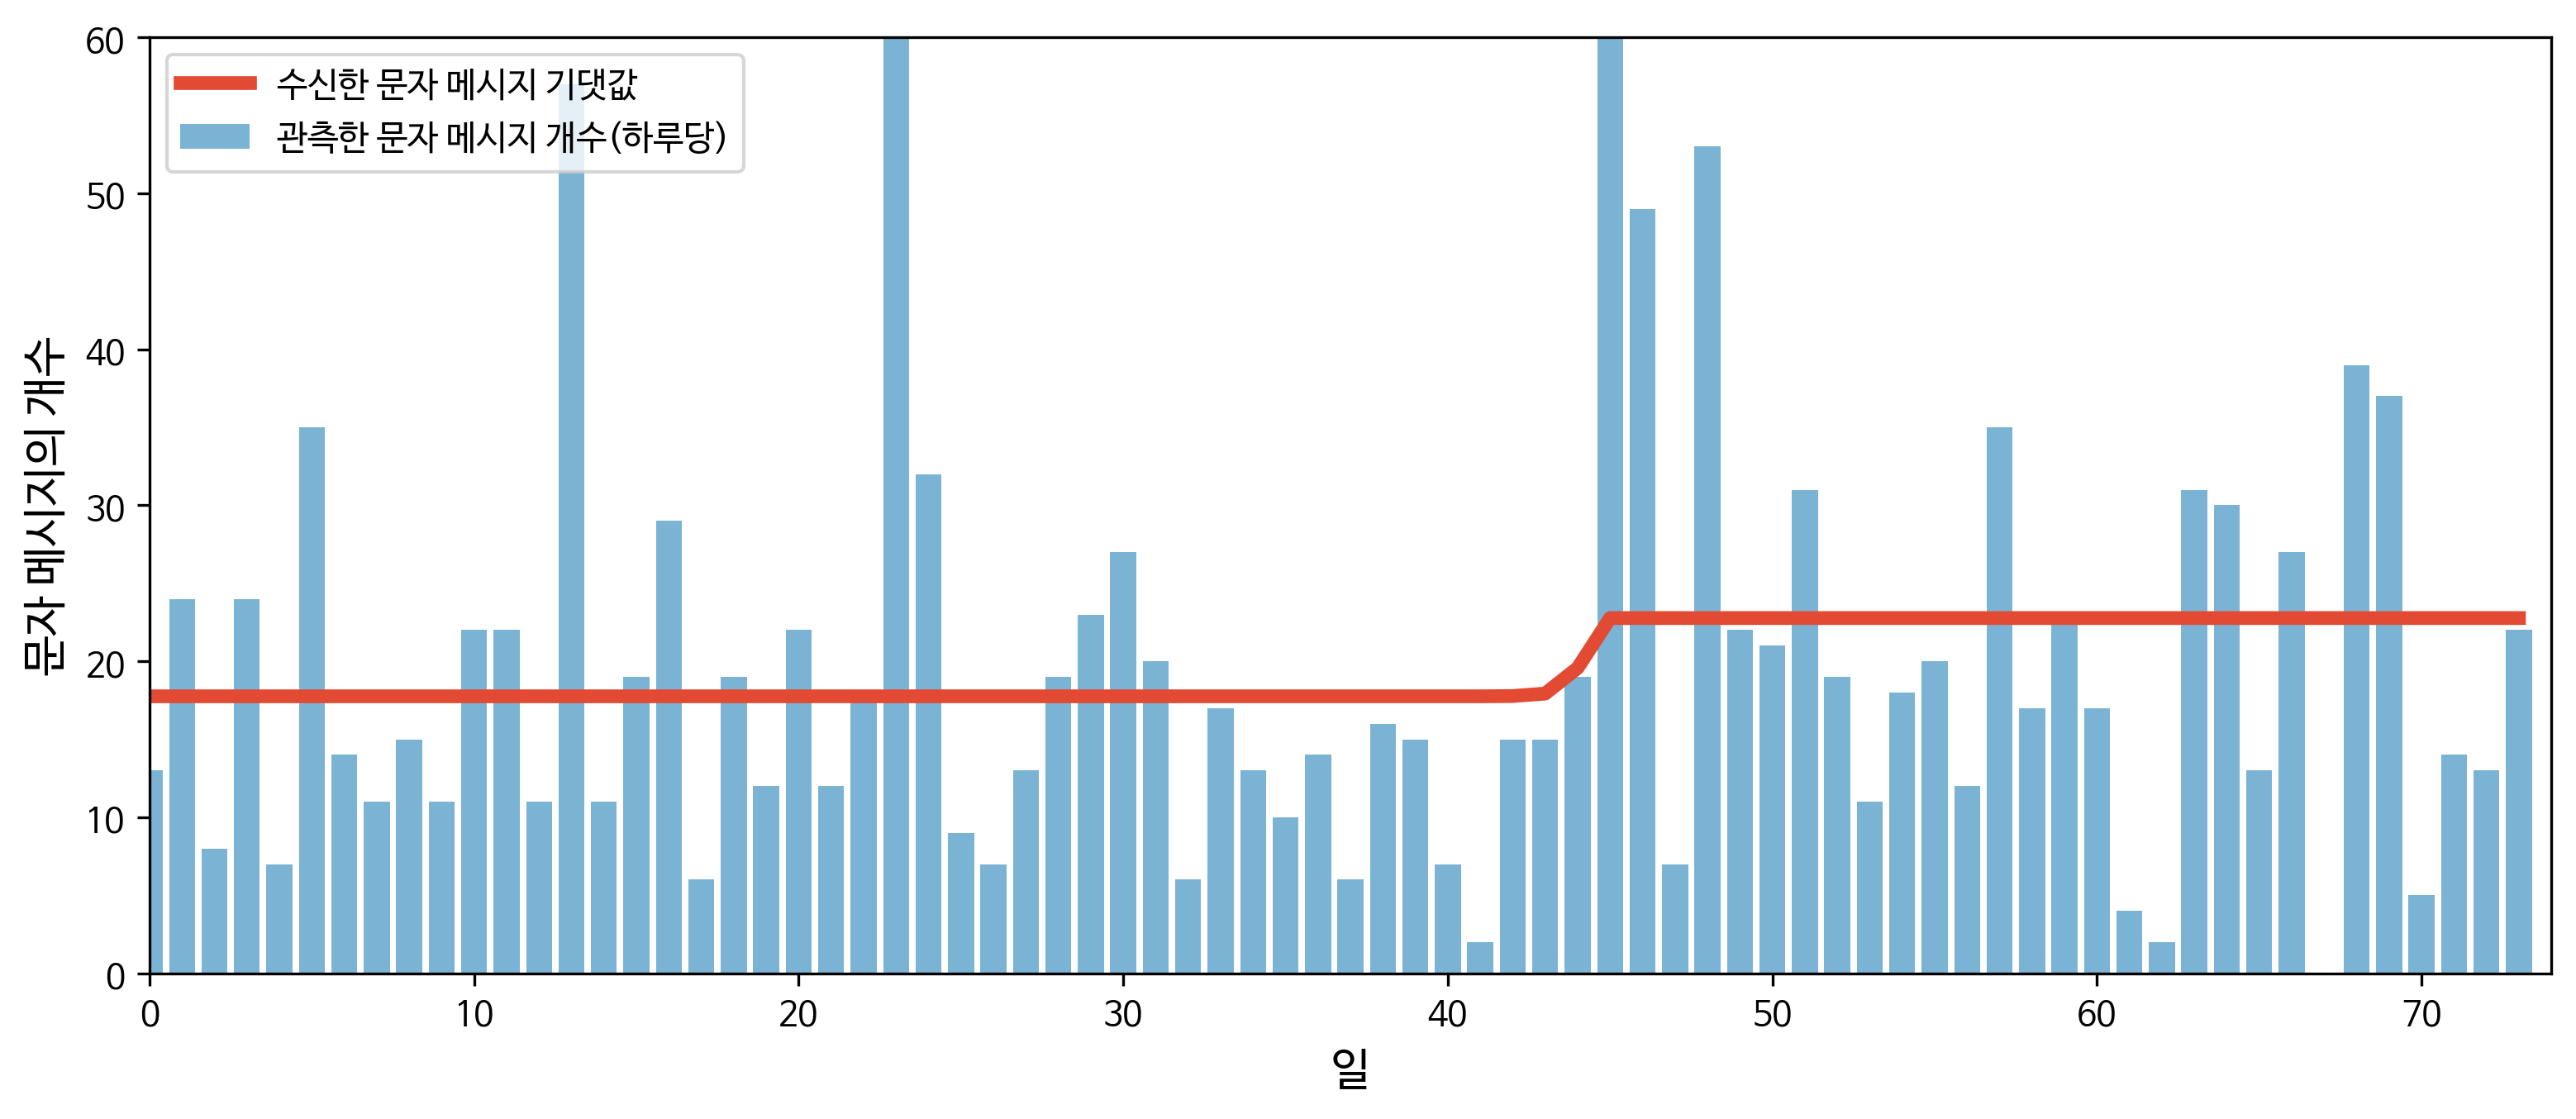

In [ ]:
figsize(12.5, 5)
# tau_samples, lambda_1_samples, lambda_2_samples은 
# 해당 사후확률분포에서 얻은 N 개의 표본은 가진다.
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data) # number of data points #데이터 포인트 수
for day in range(0, n_count_data):
    # ix 는'day'값이전에 발생한 스위치포인트(switchpoint)에 해당하는 
    # 모든 tau표본의 boolean 인덱스이다. 
    ix = day < tau_samples
    # 각 사후확률분포의 표본은 tau값에 해당한다. tau값은 스위치포인트 이전인지(lambda1)
    # 이후인지(lambda2)을 가리킨다
    # lambda1/2의 사후확률분포 표본을 취함으로써 우리는 모든 표본을 평균하여 그날의 
    # lambda 기대값을 얻을 수 있다.
    # 설명한 바와 같이 문자메시지 갯수 랜덤변수는 포아송분포를 따른다. 
    # 그러므로 lambda(포아송 모수)는 메시지갯수의 기대값이다.
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="수신한 문자 메시지 기댓값")
plt.xlim(0, n_count_data)
plt.xlabel("일", fontsize=13)
plt.ylabel("문자 메시지의 개수", fontsize=13)
#plt.title("수신한 문자메시지 기댓값")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="관측한 문자 메시지 개수(하루당)")

plt.legend(loc="upper left");
print (expected_texts_per_day)

부록

In [ ]:
print (lambda_1_samples < lambda_2_samples)
# Boolean array: True if lambda_1 is less than lambda_2.
# Boolean 배열 : lambda_1이 lambda_2보다 작으면 True이다.

[ True  True  True ...  True  True  True]


In [ ]:
# How often does this happen?
# 얼마나 자주 발생하는 가?
print ((lambda_1_samples < lambda_2_samples).sum())
# How many samples are there?
# 표본이 얼마나 있는 가?
print (lambda_1_samples.shape[0])

30000
30000


In [ ]:
# The ratio is the probability. Or, we can just use .mean:
# 비율은 확률이다. 또는 .mean을 사용할 수 있다.
print ((lambda_1_samples < lambda_2_samples).mean())

1.0


In [ ]:
# The vector abs(lambda_1_samples - lambda_2_samples) > 1 is a boolean,
# True if the values are more than 1 apart, False otherwise.
# How often does this happen? Use .mean()
# abs(lambda_1_samples - lambda_2_samples) > 1 은 boolean 벡터이다.
# 값이 1이상이면 True, 그렇치 않으면 False이다
# 얼마나 자주 발생하는 가? .mean()을 사용한다
for d in [1,2,5,10]:
    v = (abs(lambda_1_samples-lambda_2_samples)>=d).mean()
print("What is the probability the difference is larger than %d? %.2f"%(d,v))

What is the probability the difference is larger than 10? 0.00


In [ ]:
lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)
lambda_3 = pm.Exponential("lambda_3", alpha)
tau_1 = pm.DiscreteUniform("tau_1", lower=0, upper=n_count_data-1)
tau_2 = pm.DiscreteUniform("tau_2", lower=tau_1, upper=n_count_data)
@pm.deterministic
def lambda_(tau_1=tau_1, tau_2=tau_2,lambda_1=lambda_1, lambda_2=lambda_2, lambda_3 = lambda_3):
    out = np.zeros(n_count_data) # 데이터 포인트의 갯수
    out[:tau_1] = lambda_1 # lambda_1은 tau이전 lambda이다 
    out[tau_1:tau_2] = lambda_2
    out[tau_2:] = lambda_3 # lambda_2은 tau이후 lambda이다

    return out
observation = pm.Poisson("obs", lambda_, value=count_data,observed=True)
model = pm.Model([observation, lambda_1, lambda_2, lambda_3, tau_1,
tau_2])
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000)

/usr/local/lib/python3.7/dist-packages/pymc/MCMC.py:81: UserWarning: Instantiating a Model object directly is deprecated. We recommend passing variables directly to the Model subclass.
  warnings.warn(message)


 [-----------------100%-----------------] 40000 of 40000 complete in 16.0 sec

In [ ]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
lambda_3_samples = mcmc.trace('lambda_3')[:]
tau_1_samples = mcmc.trace('tau_1')[:]
tau_2_samples = mcmc.trace('tau_2')[:]

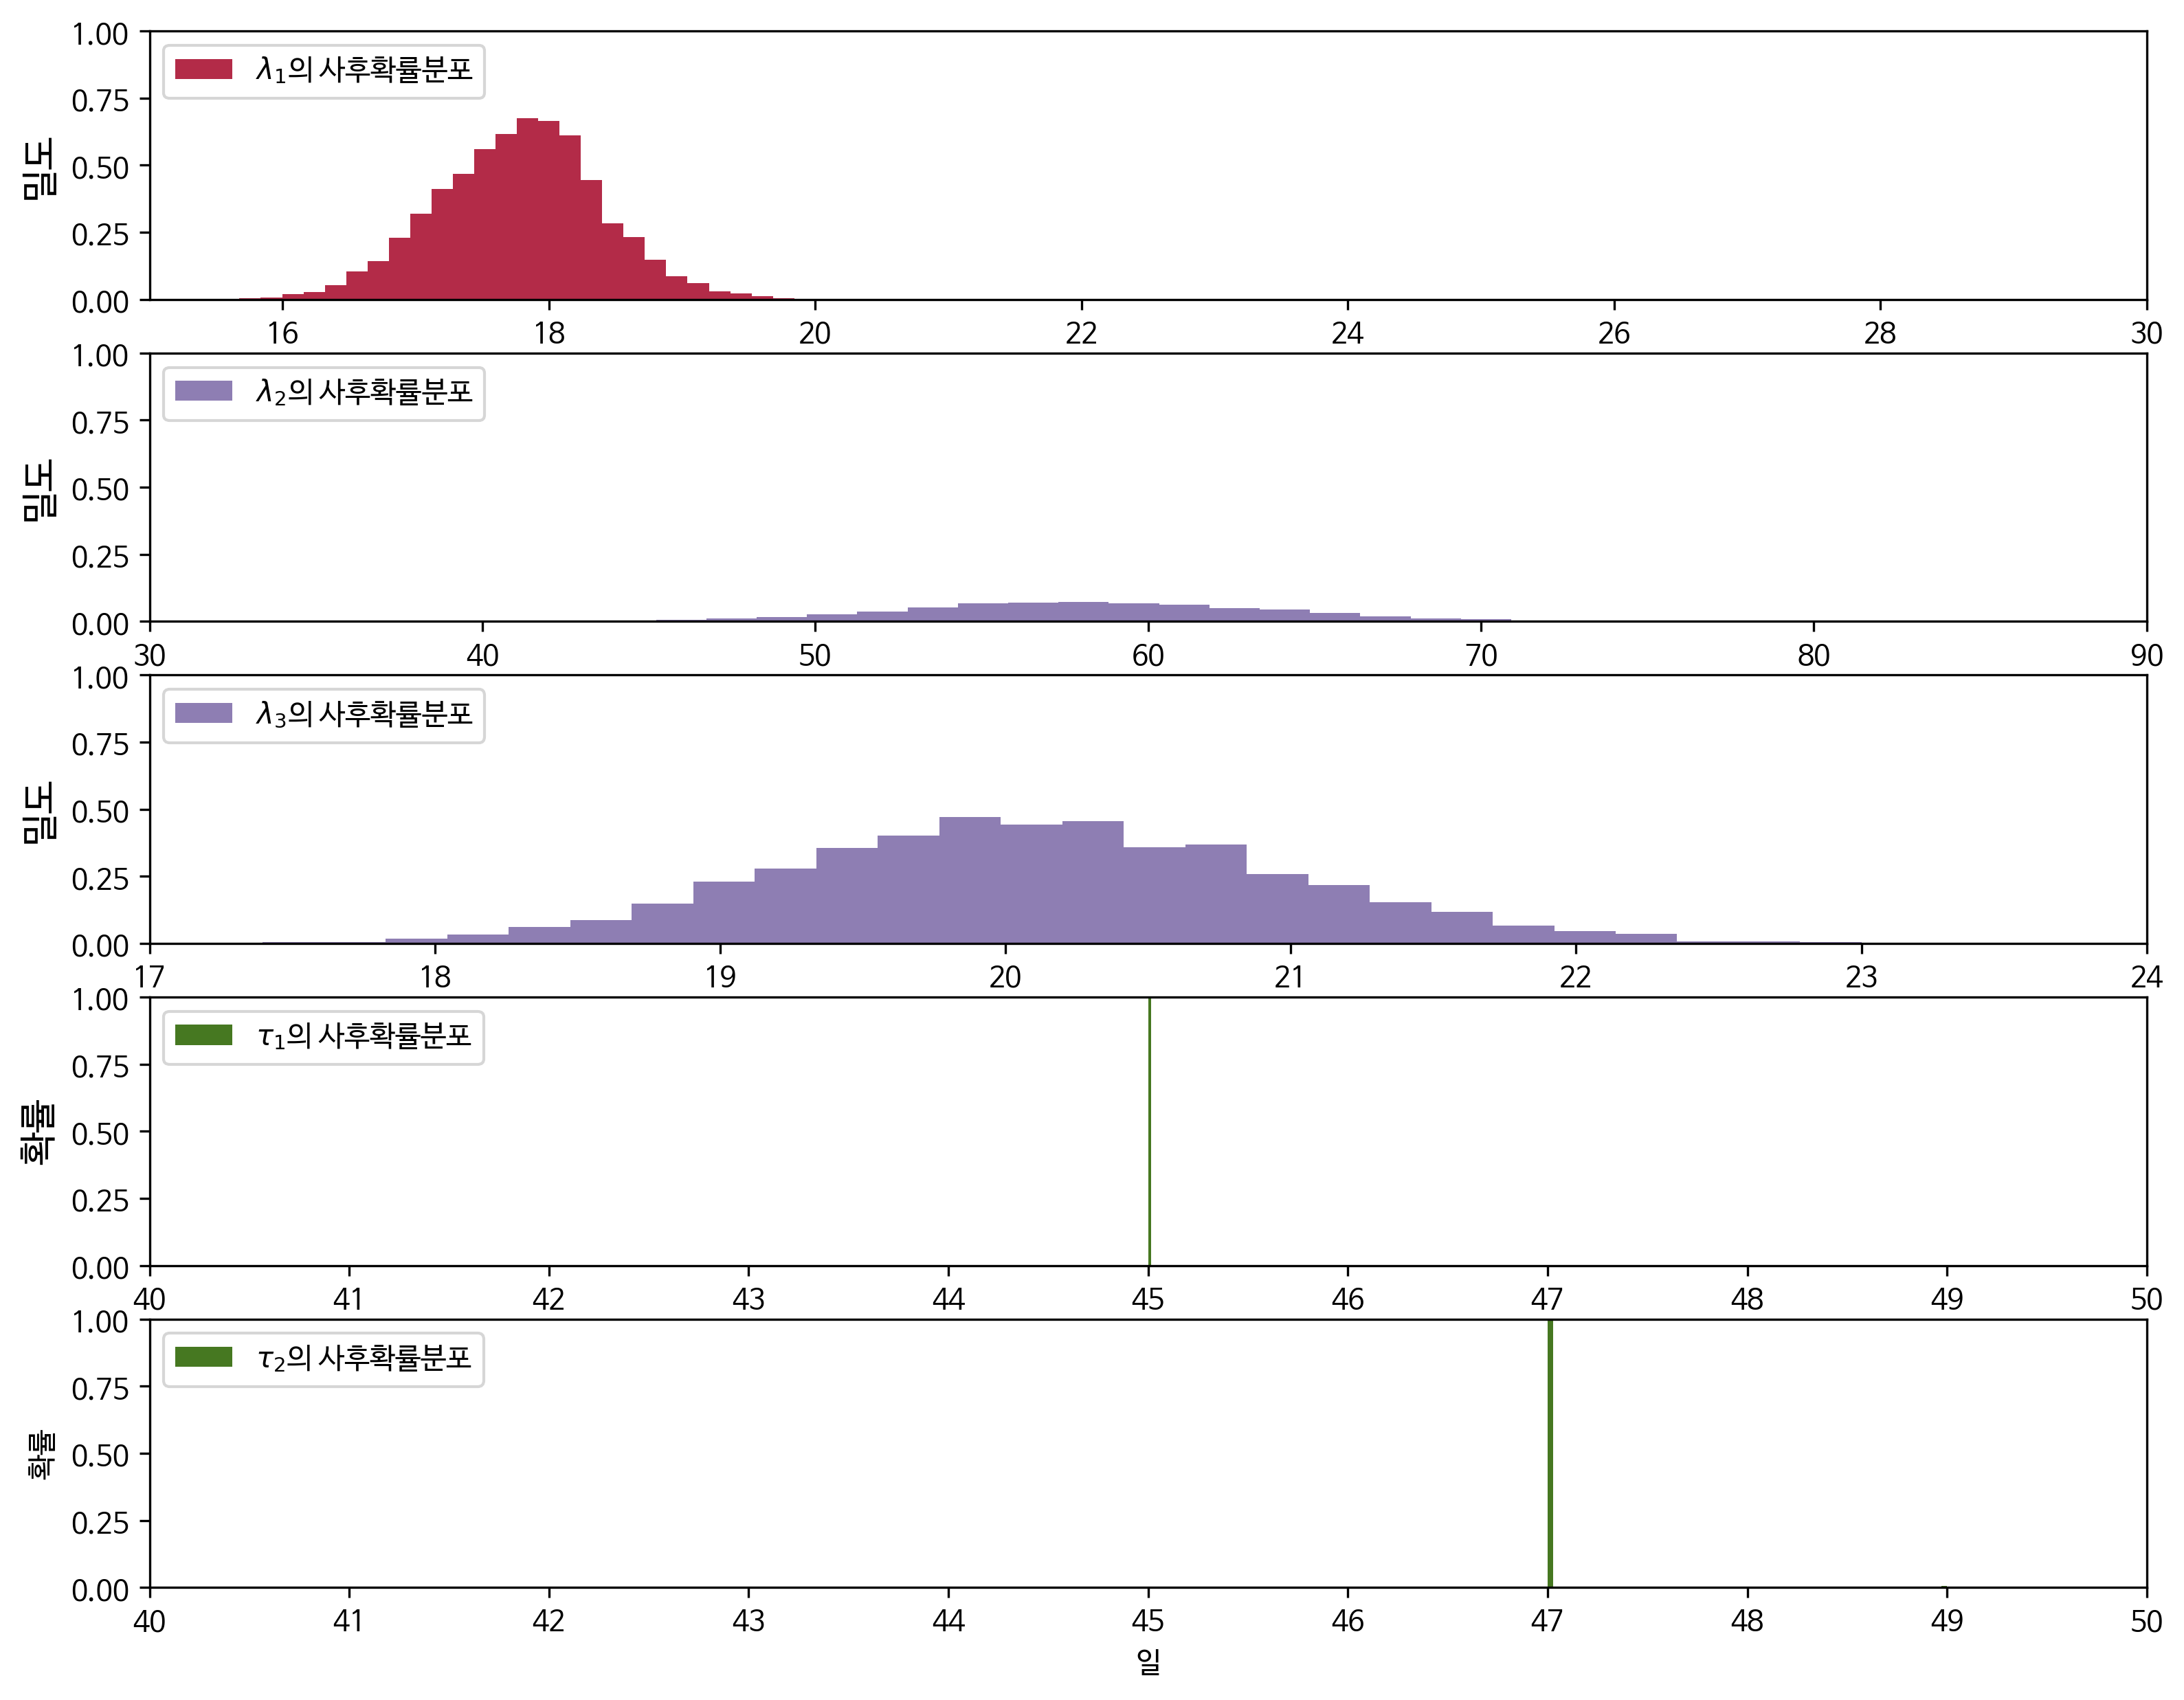

In [ ]:
figsize(12.5, 10)
# histogram of the samples:
# 표본의 히스토그램
ax = plt.subplot(511)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="$\lambda_1$의 사후확률분포", color="#A60628", density=True)
plt.legend(loc="upper left")
plt.title(r"""확장된 문자메시지 모델에서 미지의 모수 5개에 대한 사후확률분포""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ 값")
plt.ylabel("밀도", fontsize=13)

ax = plt.subplot(512)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="$\lambda_2$의 사후확률분포", color="#7A68A6", density=True)
plt.legend(loc="upper left")
plt.xlim([30, 90])
plt.xlabel("$\lambda_2$ 값")
plt.ylabel("밀도", fontsize=13)

ax = plt.subplot(513)
ax.set_autoscaley_on(False)
plt.hist(lambda_3_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="$\lambda_3$의 사후확률분포", color="#7A68A6", density=True)
plt.legend(loc="upper left")
plt.xlim([17, 24])
plt.xlabel("$\lambda_3$ 값")
plt.ylabel("밀도", fontsize=13)

plt.subplot(514)
w = 1.0 / tau_1_samples.shape[0] * np.ones_like(tau_1_samples)
plt.hist(tau_1_samples, bins=n_count_data, alpha=1,
         label=r"$\tau_1$의 사후확률분포",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.xlim([40, 50])

plt.xlabel(r"일", fontsize=13)
plt.ylabel("확률", fontsize=13)

plt.subplot(515)
w = 1.0 / tau_2_samples.shape[0] * np.ones_like(tau_2_samples)
plt.hist(tau_2_samples, bins=n_count_data, alpha=1,
         label=r"$\tau_2$의 사후확률분포",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.xlim([40, 50])
plt.xlabel(r"일")
plt.ylabel("확률");

In [ ]:
print (lambda_1_samples.mean())
print (lambda_1_samples.mean())

17.772071226760296
17.772071226760296


In [ ]:
(lambda_2_samples-lambda_1_samples)/lambda_1_samples

array([1.93045923, 2.26941038, 2.26941038, ..., 1.69824985, 2.20490033,
       2.20490033])

In [ ]:
relative_increase_samples = (lambda_2_samples-lambda_1_samples)/lambda_1_samples
print (relative_increase_samples)

[1.93045923 2.26941038 2.26941038 ... 1.69824985 2.20490033 2.20490033]


2.2858093038202933


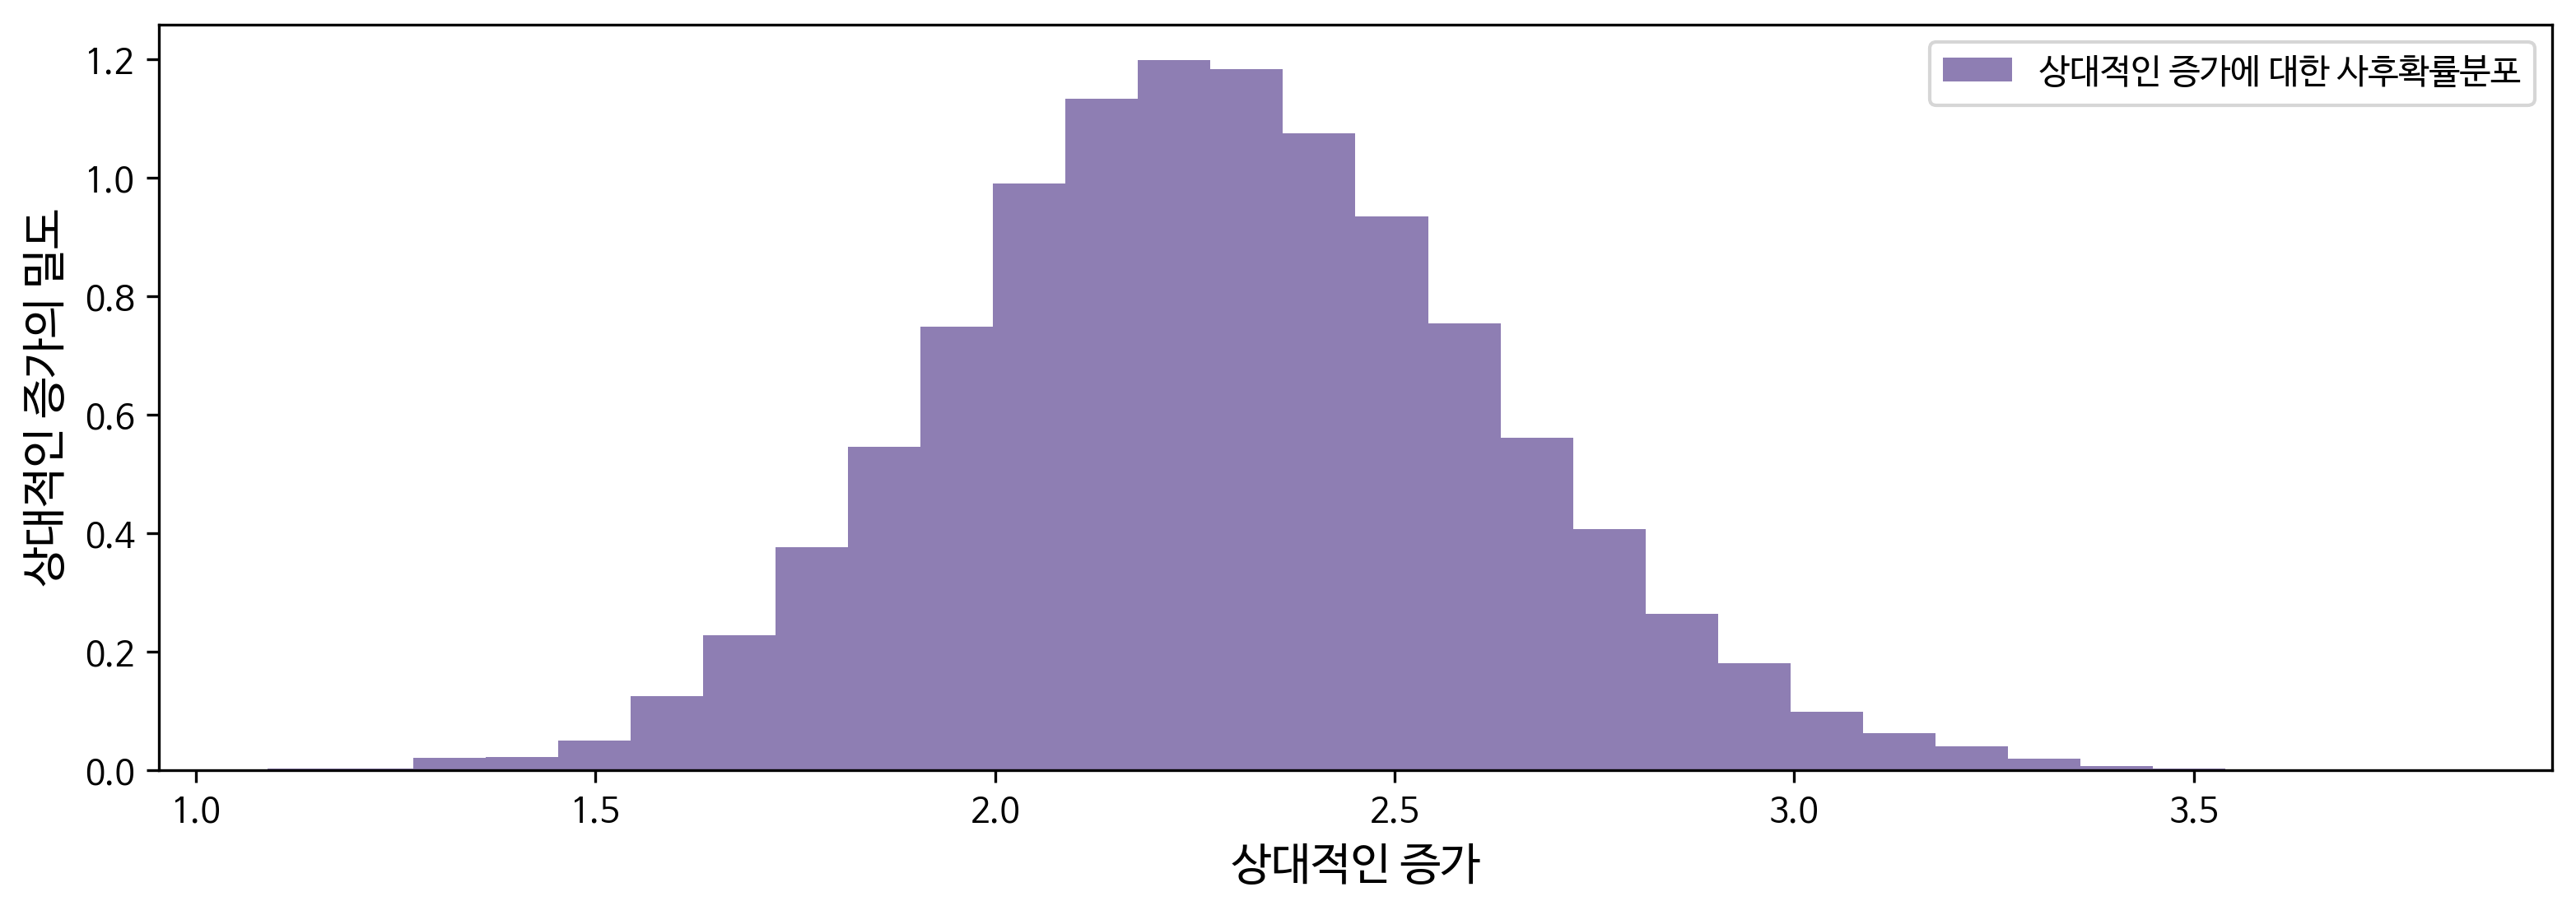

In [ ]:
figsize(12.5,4)
plt.hist(relative_increase_samples, histtype='stepfilled',
bins=30, alpha=0.85, color="#7A68A6", density=True,
label='상대적인 증가에 대한 사후확률분포')
plt.xlabel("상대적인 증가", fontsize=13)
plt.ylabel("상대적인 증가의 밀도", fontsize=13)
plt.title("상대적인 증가에 대한 사후확률분포")
plt.legend();
print (relative_increase_samples.mean())

In [ ]:
print (relative_increase_samples.mean())

2.2858093038202933


In [ ]:
ix = tau_samples < 45
print (lambda_1_samples[ix].mean())

17.757196340060663
